<a href="https://colab.research.google.com/github/Rockydedhia/pythonproject/blob/master/E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("/Ecommerce.csv",encoding= 'unicode_escape')

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.groupby("CustomerID")["Quantity"].count()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: Quantity, Length: 4372, dtype: int64

## **Remove duplicate rows**

In [ ]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.drop(df[df.duplicated()].index,axis="rows",inplace=True)

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## **Remove rows which have negative values in Quantity column**

In [ ]:
df=df[df["Quantity"]>0]

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Add the columns - Month, Day and Hour for the invoice

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526054 non-null  object 
 1   StockCode    526054 non-null  object 
 2   Description  525462 non-null  object 
 3   Quantity     526054 non-null  int64  
 4   InvoiceDate  526054 non-null  object 
 5   UnitPrice    526054 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      526054 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [ ]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 526054, dtype: datetime64[ns]

In [ ]:
df["Hour"]=df["InvoiceDate"].dt.hour
df["Month"]=df["InvoiceDate"].dt.month
df["Day"]=df["InvoiceDate"].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,12,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,12,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,12,9


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133322
Country             0
Hour                0
Month               0
Day                 0
dtype: int64

# How many orders made by the customers?

In [ ]:
orders=df.groupby(['CustomerID'])['Quantity'].sum()
print(orders)

CustomerID
12346.0    74215
12347.0     2458
12348.0     2341
12349.0      631
12350.0      197
           ...  
18280.0       45
18281.0       54
18282.0      103
18283.0     1357
18287.0     1586
Name: Quantity, Length: 4339, dtype: int64


## TOP 5 customers with higher number of orders


In [ ]:
orders.head()

CustomerID
12346.0    74215
12347.0     2458
12348.0     2341
12349.0      631
12350.0      197
Name: Quantity, dtype: int64

# How much money spent by the customers? 

In [ ]:

Money=df.groupby(['CustomerID'])['UnitPrice'].sum()
print(Money)

CustomerID
12346.0       1.04
12347.0     481.21
12348.0     178.71
12349.0     605.10
12350.0      65.30
            ...   
18280.0      47.65
18281.0      39.36
18282.0      62.39
18283.0    1174.33
18287.0     104.55
Name: UnitPrice, Length: 4339, dtype: float64


## **TOP 5 customers with highest money spent**

In [ ]:
Money.sort_values(ascending = False).head()


CustomerID
14096.0    33332.45
14911.0    26150.35
17841.0    19471.68
12744.0    12949.99
12748.0    11788.31
Name: UnitPrice, dtype: float64

## How many orders per month? 

In [ ]:

Per_month=df.groupby(['Month'])['Quantity'].sum().reset_index(name ='Total_Order_Per_Month')
print(Per_month)

    Month  Total_Order_Per_Month
0       1                 397030
1       2                 286074
2       3                 384023
3       4                 311314
4       5                 398686
5       6                 393633
6       7                 405473
7       8                 424266
8       9                 574169
9      10                 626373
10     11                 768468
11     12                 675510


## How many orders per day? 


In [ ]:

Per_Day=df.groupby(['Day'])['Quantity'].sum().reset_index(name ='Total_Order_Per_Day')
print(Per_Day)

    Day  Total_Order_Per_Day
0     1               179365
1     2               164612
2     3               159662
3     4               208893
4     5               231740
5     6               216033
6     7               240484
7     8               198464
8     9               269779
9    10               182843
10   11               217179
11   12               145107
12   13               171468
13   14               211723
14   15               176178
15   16               168168
16   17               212669
17   18               268848
18   19               157503
19   20               217383
20   21               196365
21   22               165113
22   23               155316
23   24               168129
24   25               162529
25   26               115819
26   27               147142
27   28               193465
28   29               119170
29   30               127676
30   31                96194


## **How many orders per hour?**

In [ ]:

Per_Hour=df.groupby(['Hour'])['Quantity'].sum().reset_index(name ='Total_Order_Per_Day')
print(Per_Hour)

    Hour  Total_Order_Per_Day
0      6                    1
1      7                15370
2      8               158689
3      9               521680
4     10               818775
5     11               674511
6     12               851044
7     13               708433
8     14               604444
9     15               649906
10    16               337749
11    17               194786
12    18                67194
13    19                32929
14    20                 9508


# How many orders for each country

In [ ]:

Per_Country=df.groupby(['Country'])['Quantity'].sum().reset_index(name ='Total_Order_Per_Day')
print(Per_Country)

                 Country  Total_Order_Per_Day
0              Australia                84199
1                Austria                 4881
2                Bahrain                  314
3                Belgium                23237
4                 Brazil                  356
5                 Canada                 2763
6        Channel Islands                 9485
7                 Cyprus                 6340
8         Czech Republic                  671
9                Denmark                 8235
10                  EIRE               147281
11    European Community                  499
12               Finland                10704
13                France               112061
14               Germany               119156
15                Greece                 1557
16             Hong Kong                 4713
17               Iceland                 2458
18                Israel                 4406
19                 Italy                 8112
20                 Japan          

In [ ]:
Per_Month=df.groupby(['Month'])['Quantity'].sum().reset_index(name ='Total_Order_Per_Month')
print(Per_Month)

    Month  Total_Order_Per_Month
0       1                 397030
1       2                 286074
2       3                 384023
3       4                 311314
4       5                 398686
5       6                 393633
6       7                 405473
7       8                 424266
8       9                 574169
9      10                 626373
10     11                 768468
11     12                 675510


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.lineplot(x="Month", y="Total_Order_Per_Month", data=Per_month)
# plt.show()

In [ ]:

Money_spend_ctry=df.groupby(['Country'])['UnitPrice'].sum().reset_index(name ='Total_Money_By_each_county')
print(Money_spend_ctry)

                 Country  Total_Money_By_each_county
0              Australia                3.605750e+03
1                Austria                1.693900e+03
2                Bahrain                8.276000e+01
3                Belgium                7.372850e+03
4                 Brazil                1.426000e+02
5                 Canada                9.105800e+02
6        Channel Islands                3.388000e+03
7                 Cyprus                3.466150e+03
8         Czech Republic                7.827000e+01
9                Denmark                1.195550e+03
10                  EIRE                3.844438e+04
11    European Community                2.898000e+02
12               Finland                3.628440e+03
13                France                3.694973e+04
14               Germany                3.349958e+04
15                Greece                6.632900e+02
16             Hong Kong                6.649640e+03
17               Iceland                4.8121

In [ ]:
df1=df._get_numeric_data()

In [ ]:
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,11,12,1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,14,12,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,14,12,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,14,12,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,14,12,1
...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,10,12,9
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,10,12,9
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,10,12,9
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10,12,9


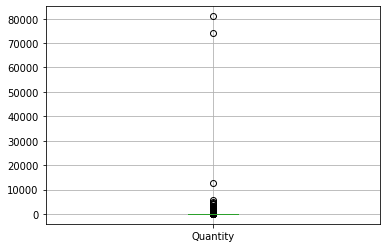

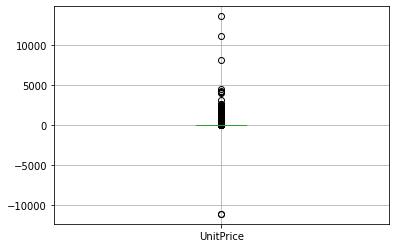

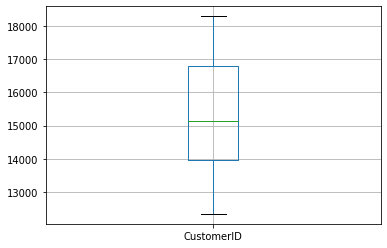

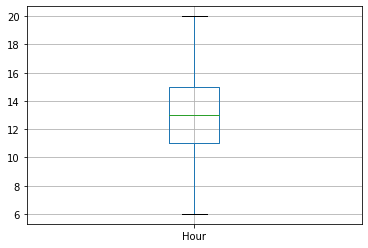

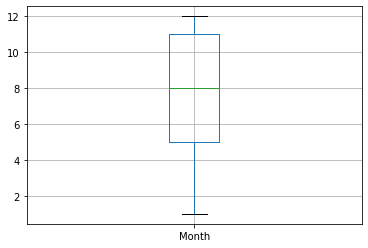

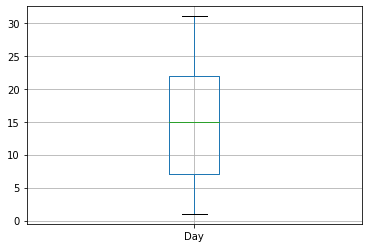

In [ ]:
import matplotlib.pyplot as plt

for column in df1:
    plt.figure()
    df.boxplot([column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526054 non-null  object        
 1   StockCode    526054 non-null  object        
 2   Description  525462 non-null  object        
 3   Quantity     526054 non-null  int64         
 4   InvoiceDate  526054 non-null  datetime64[ns]
 5   UnitPrice    526054 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      526054 non-null  object        
 8   Hour         526054 non-null  int64         
 9   Month        526054 non-null  int64         
 10  Day          526054 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 48.2+ MB


<Figure size 432x288 with 0 Axes>

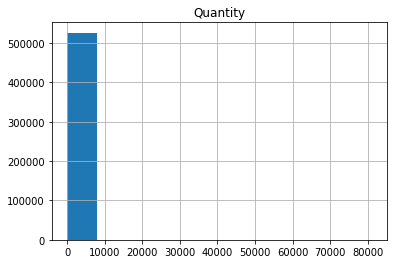

<Figure size 432x288 with 0 Axes>

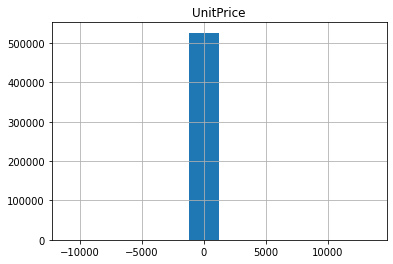

<Figure size 432x288 with 0 Axes>

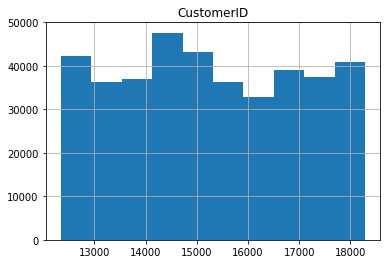

<Figure size 432x288 with 0 Axes>

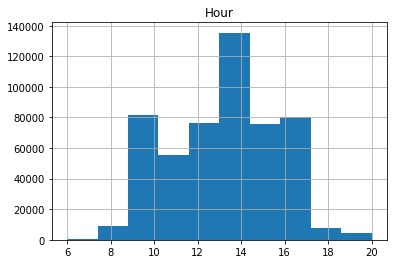

<Figure size 432x288 with 0 Axes>

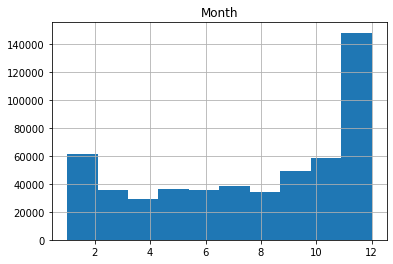

<Figure size 432x288 with 0 Axes>

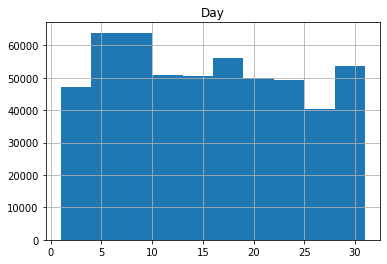

In [ ]:
for column in df1:
    plt.figure()
    df.hist([column])

In [ ]:


for column in df1:
    plt.figure()
    df.distplot([column])

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Hour,Month,Day
count,526054.000000,526054.000000,392732.000000,526054.000000,526054.000000,526054.000000
mean,10.730874,3.871747,15287.734822,13.074633,7.551879,15.026227
std,157.591838,42.016560,1713.567773,2.442553,3.508391,8.661333
min,1.000000,-11062.060000,12346.000000,6.000000,1.000000,1.000000
25%,1.000000,1.250000,13955.000000,11.000000,5.000000,7.000000
50%,4.000000,2.080000,15150.000000,13.000000,8.000000,15.000000
75%,11.000000,4.130000,16791.000000,15.000000,11.000000,22.000000
max,80995.000000,13541.330000,18287.000000,20.000000,12.000000,31.000000


In [ ]:
for col in df:
    print(df[col].unique())

['536365' '536366' '536367' ... '581585' '581586' '581587']
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'LETTER "U" BLING KEY RING'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[    6     8     2    32     3     4    24    12    48    18    20    36
    80    64    10   120    96    23     5     1    50    40   100   192
   432   144   288    16     9   128    25    30    28     7    56    72
   200   600   480    14    11    33    13    70   252    60   216   384
    27    15    22    19    17    21    34    47   108    52    75   270
    42   240    90   320  1824   204    69   160  2880  1400    39    26
  1440    31    82    78    97    98    35    57   110   720   156   324
    38    37    49    95    29    41   402   378   150   300    54   104
    67   258    66    44    55    46    99    61   408   972   208  1008
  1000  1488   250  1394   400

In [ ]:
df.duplicated().sum()

0